In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into a training set (80%) and a testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # You can change the number of neighbors as needed

# Fit the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)


In [3]:
help(iris)

Help on Bunch in module sklearn.utils._bunch object:

class Bunch(builtins.dict)
 |  Bunch(**kwargs)
 |  
 |  Container object exposing keys as attributes.
 |  
 |  Bunch objects are sometimes used as an output for functions and methods.
 |  They extend dictionaries by enabling values to be accessed by key,
 |  `bunch["value_key"]`, or by an attribute, `bunch.value_key`.
 |  
 |  Examples
 |  --------
 |  >>> from sklearn.utils import Bunch
 |  >>> b = Bunch(a=1, b=2)
 |  >>> b['b']
 |  2
 |  >>> b.b
 |  2
 |  >>> b.a = 3
 |  >>> b['a']
 |  3
 |  >>> b.c = 6
 |  >>> b['c']
 |  6
 |  
 |  Method resolution order:
 |      Bunch
 |      builtins.dict
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __dir__(self)
 |      Default dir() implementation.
 |  
 |  __getattr__(self, key)
 |  
 |  __getitem__(self, key)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __init__(self, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __setattr__(sel

In [4]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [5]:
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df = data[["sepal length (cm)", "sepal width (cm)"]]
print(iris_df.head())


   sepal length (cm)  sepal width (cm)
0                5.1               3.5
1                4.9               3.0
2                4.7               3.2
3                4.6               3.1
4                5.0               3.6


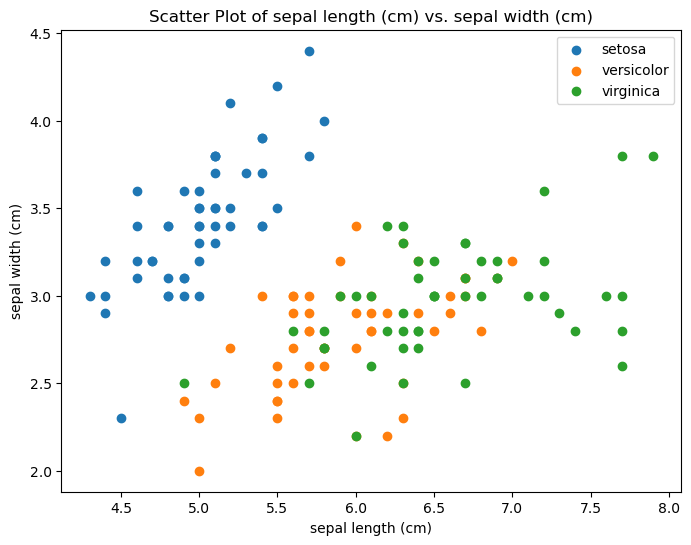

In [11]:
# Select the first two features for the scatter plot
feature1 = 0  # Index of the first feature (e.g., Sepal Length)
feature2 = 1  # Index of the second feature (e.g., Sepal Width)

# Create a scatter plot for the selected features
plt.figure(figsize=(8, 6))

for target_class in range(3):
    # Plot data points for each class
    plt.scatter(X[y == target_class, 0], X[y == target_class, 1], label=iris.target_names[target_class], marker='o')

plt.xlabel(iris.feature_names[feature1])
plt.ylabel(iris.feature_names[feature2])
plt.title(f'Scatter Plot of {iris.feature_names[feature1]} vs. {iris.feature_names[feature2]}')
plt.legend()
plt.show()


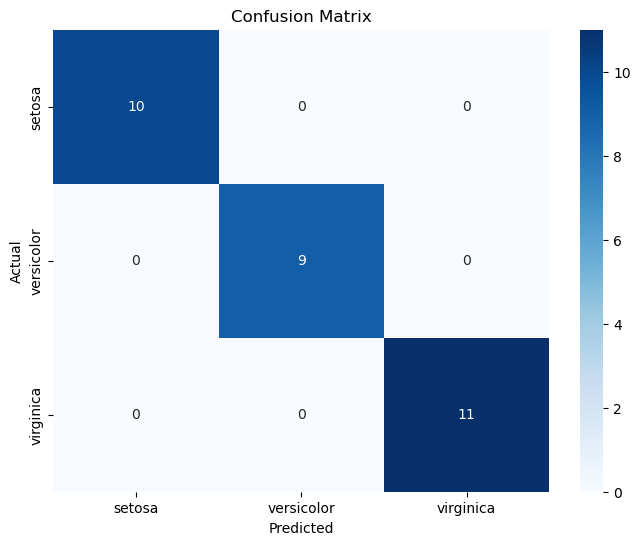

In [7]:


# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




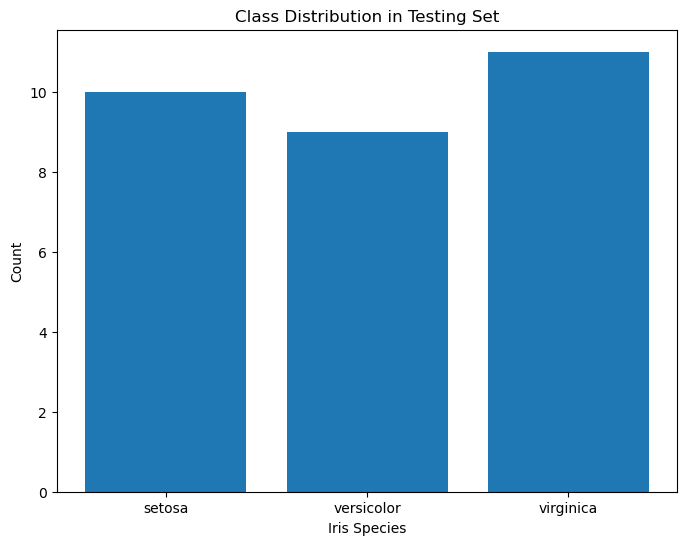

In [8]:
# Create a bar chart for the class distribution in the testing set
class_distribution = [sum(y_test == i) for i in range(3)]
plt.figure(figsize=(8, 6))
plt.bar(iris.target_names, class_distribution)
plt.xlabel('Iris Species')
plt.ylabel('Count')
plt.title('Class Distribution in Testing Set')
plt.show()

In [9]:


# Create a DataFrame for the new data point with only sepal length and sepal width
# Set NaN (null) values for the last two features (petal length and petal width)
new_flower = pd.DataFrame(data=[[5.2, 3.1, 4.2, 1.5]], columns=["sepal length", "sepal width", "", ""])

# Predict the species of the new data point
predicted_species = knn.predict(new_flower)

print(f"Predicted Species: {iris.target_names[predicted_species[0]]}")


Predicted Species: versicolor


D:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


D:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


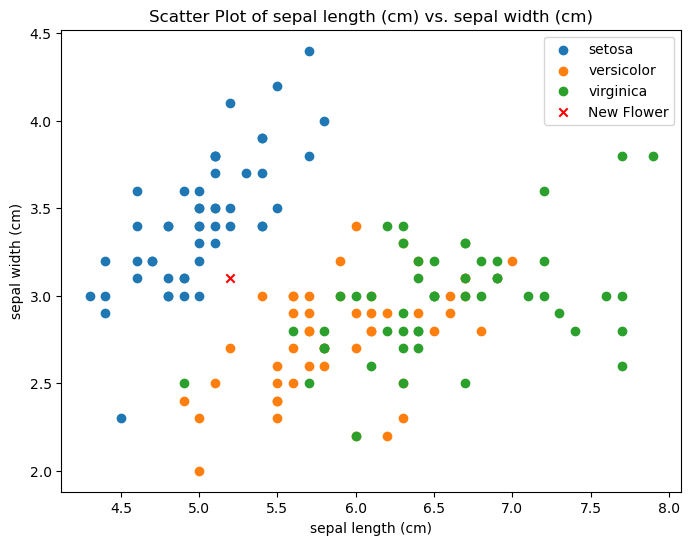

Predicted Species: versicolor


In [10]:



# Predict the species of the new data point
predicted_species = knn.predict(new_flower)

# Create a scatter plot of the sepal length and sepal width for all data points
plt.figure(figsize=(8, 6))

# Plot data points for the existing data (X) in the training set
for target_class in range(3):
    plt.scatter(X[y == target_class, 0], X[y == target_class, 1], label=iris.target_names[target_class], marker='o')

# Plot the new data point (if it's not NaN)
if not np.isnan(new_flower["sepal length"].values[0]) and not np.isnan(new_flower["sepal width"].values[0]):
    plt.scatter(new_flower["sepal length"].values[0], new_flower["sepal width"].values[0], marker='x', color='red', label="New Flower")

plt.xlabel(iris.feature_names[feature1])
plt.ylabel(iris.feature_names[feature2])
plt.title(f'Scatter Plot of {iris.feature_names[feature1]} vs. {iris.feature_names[feature2]}')
plt.legend()
plt.show()

print(f"Predicted Species: {iris.target_names[predicted_species[0]]}")
